In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# 3. One-hot encoding etykiet
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [5]:
# 4. Budowa modelu
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 5. Kompilacja modelu
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [7]:
# 6. Trenowanie modelu
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=2)



Epoch 1/10
375/375 - 3s - 8ms/step - accuracy: 0.8899 - loss: 0.4022 - val_accuracy: 0.9414 - val_loss: 0.2155
Epoch 2/10
375/375 - 2s - 6ms/step - accuracy: 0.9474 - loss: 0.1846 - val_accuracy: 0.9558 - val_loss: 0.1561
Epoch 3/10
375/375 - 3s - 9ms/step - accuracy: 0.9609 - loss: 0.1350 - val_accuracy: 0.9641 - val_loss: 0.1294
Epoch 4/10
375/375 - 2s - 6ms/step - accuracy: 0.9698 - loss: 0.1051 - val_accuracy: 0.9668 - val_loss: 0.1154
Epoch 5/10
375/375 - 2s - 5ms/step - accuracy: 0.9749 - loss: 0.0861 - val_accuracy: 0.9697 - val_loss: 0.1023
Epoch 6/10
375/375 - 3s - 7ms/step - accuracy: 0.9804 - loss: 0.0709 - val_accuracy: 0.9720 - val_loss: 0.0968
Epoch 7/10
375/375 - 2s - 5ms/step - accuracy: 0.9830 - loss: 0.0598 - val_accuracy: 0.9727 - val_loss: 0.0959
Epoch 8/10
375/375 - 3s - 9ms/step - accuracy: 0.9855 - loss: 0.0506 - val_accuracy: 0.9735 - val_loss: 0.0936
Epoch 9/10
375/375 - 2s - 7ms/step - accuracy: 0.9887 - loss: 0.0423 - val_accuracy: 0.9748 - val_loss: 0.0900
E

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Dokładność na zbiorze testowym: {test_acc:.4f}')

Dokładność na zbiorze testowym: 0.9758


In [9]:

# 8. Wykresy strat i dokładności
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

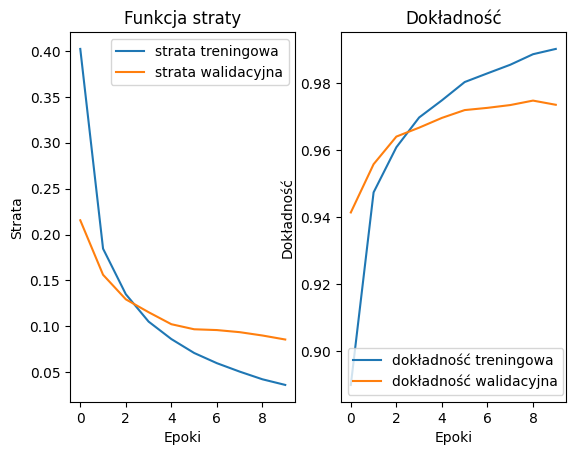

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


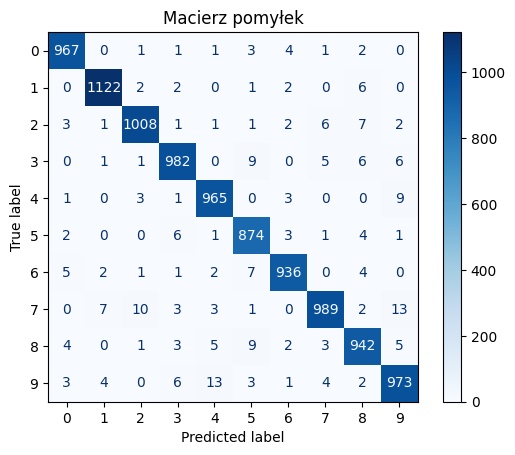

In [10]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='strata treningowa')
plt.plot(history.history['val_loss'], label='strata walidacyjna')
plt.title('Funkcja straty')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='dokładność walidacyjna')
plt.title('Dokładność')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()

plt.show()

# 9. Predykcje i macierz pomyłek
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.show()